In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Merging 12 months of sales data into a single csv file

In [2]:
df = pd.read_csv("./Pandas-Data-Science/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
files = [file for file in os.listdir("./Pandas-Data-Science/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Pandas-Data-Science/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

## Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.shape

(186850, 6)

In [6]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

### Drop rows of Nan

In [7]:
all_data.isna().any(axis=1).count()

186850

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
nan_df.shape

(545, 6)

In [10]:
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
all_data.shape

(186305, 6)

In [12]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
all_data['Order Date'][0:2]

C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\551984340.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  all_data['Order Date'][0:2]


0    04/19/19 08:46
2    04/07/19 22:30
Name: Order Date, dtype: object

In [14]:
all_data['Order Date'].str[0:2]

0         04
2         04
3         04
4         04
5         04
          ..
186845    09
186846    09
186847    09
186848    09
186849    09
Name: Order Date, Length: 186305, dtype: object

#### Get rid of text in order date column

In [15]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [16]:
all_data['Order Date'].count()

185950

#### Make columns correct type

In [17]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [18]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [19]:
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [21]:
all_data['Month'] = all_data['Order Date'].str[0:2]


In [22]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [23]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

#### Add month column(alternative method)

In [24]:
all_data['Month2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4


In [25]:
all_data.drop(columns="Month2", axis=1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Add City Column

In [51]:
all_data(['Purchase Address']).split(",")[1].strip(" ")

TypeError: 'DataFrame' object is not callable

In [27]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month2,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)


In [28]:
all_data.drop(columns="Month2", axis=1, inplace=True)
all_data.head(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)


## Data Exploration

#### Q1 What was the best month for sales? How much was earned that month?

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [30]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99


In [31]:
all_data.groupby(['Month']).sum()

C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\2666040485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\3653511109.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])


range(1, 13)


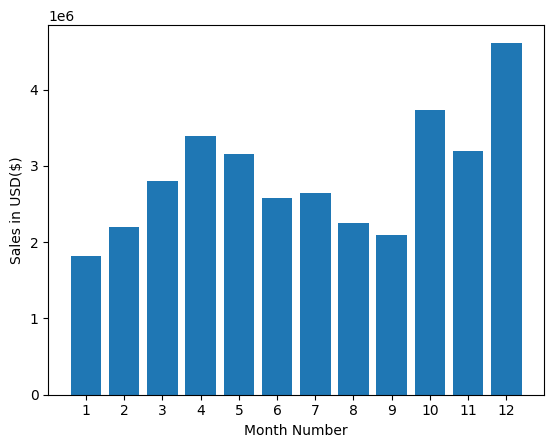

In [32]:
months = range(1,13)
print(months)

plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month Number")
plt.show()

#### Q2 What city sold the most product

In [33]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'Sales'],
      dtype='object')

In [34]:
all_data.groupby(['City']).sum()

C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\4158429969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


In [35]:
keys = [city for city, df in all_data.groupby(['City'])]
keys

C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\1470899911.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]


['Atlanta (GA)',
 'Austin (TX)',
 'Boston (MA)',
 'Dallas (TX)',
 'Los Angeles (CA)',
 'New York City (NY)',
 'Portland (ME)',
 'Portland (OR)',
 'San Francisco (CA)',
 'Seattle (WA)']

C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\3454990920.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])


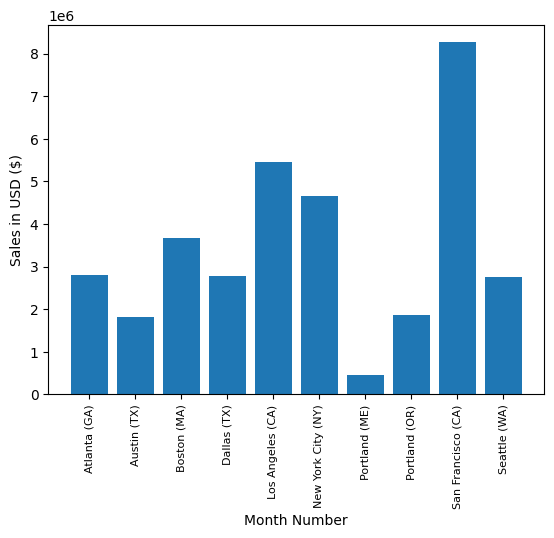

In [36]:
plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")
plt.xticks(keys, rotation="vertical", size=8)
plt.show()

#### Q3 What time should we display advertisements to maximize likelihood of customer's buying product?

In [37]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'Sales'],
      dtype='object')

In [38]:
# add hour column

all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1


C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\2891002684.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


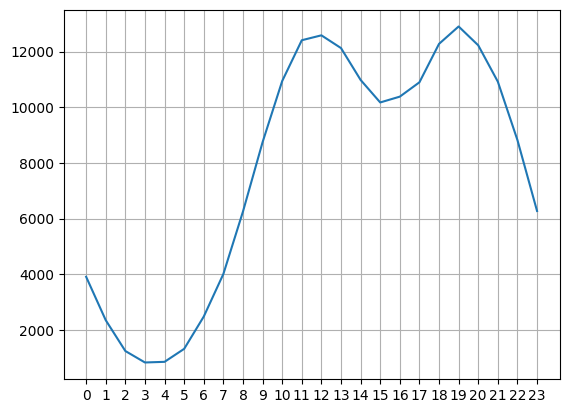

In [39]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

### Q4 What products are most often sold together?

In [40]:
all_data.shape

(185950, 12)

In [41]:
all_data.groupby(['Order ID']).sum()

C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\1559694698.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Order ID']).sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Order ID,,,,,,,
141234,1,700.00,1,700.00,21,25,1
141235,1,14.95,1,14.95,14,15,1
141236,2,11.99,1,23.98,13,33,1
141237,1,149.99,1,149.99,20,33,1
141238,1,11.99,1,11.99,11,59,1
...,...,...,...,...,...,...,...
319666,1,14.95,12,14.95,20,58,1
319667,2,3.84,12,7.68,12,1,1
319668,1,400.00,12,400.00,6,43,1


In [42]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'Sales', 'Hour', 'Minute',
       'Count'],
      dtype='object')

In [43]:
# -select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]
print(df.shape)

#concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', "Grouped"]].drop_duplicates()

(14649, 12)


C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\3969603725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [44]:
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [45]:
# counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

In [46]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()["Quantity Ordered"]

keys = [pair for pair, df in product_group]
keys

C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\1968077143.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

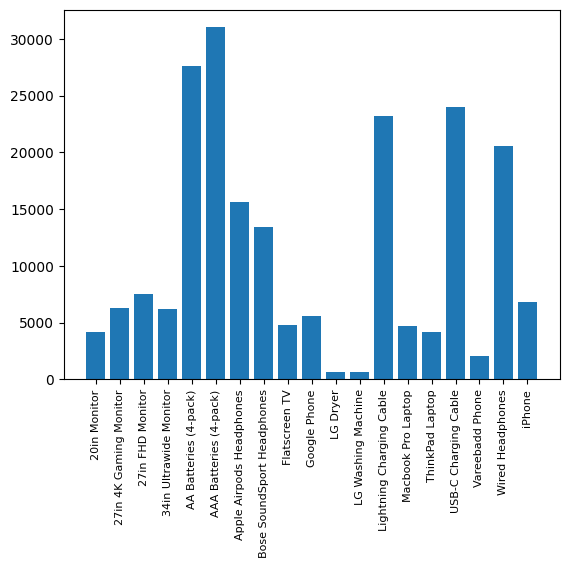

In [47]:
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\2862042790.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\2862042790.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\snikh\AppData\Local\Temp\ipykernel_21064\2862042790.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


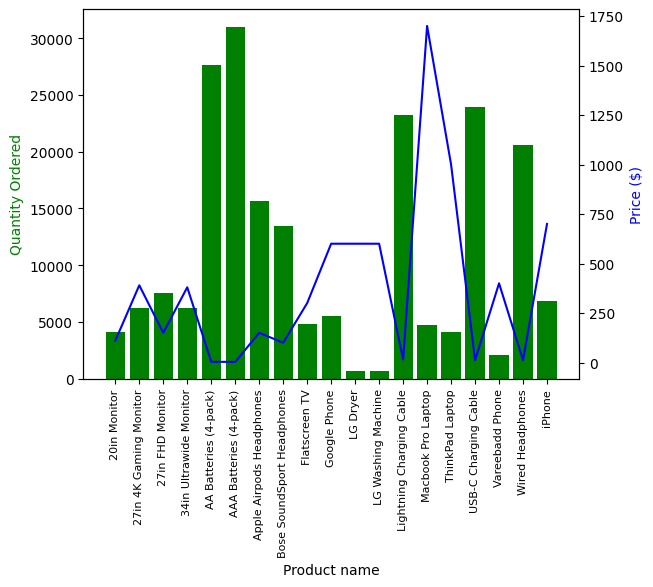

In [48]:
# adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product name')
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Price ($)", color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [1]:
import pandas as pd
info = pd.DataFrame()
print(info)

Empty DataFrame
Columns: []
Index: []


In [2]:
info = {"one": pd.Series([1,2,3,4,5], index=['a','b','c','d','e']),
       "two": pd.Series([1,2,3,4,5,6], index=['a','b','c','d','e','f'])}
info = pd.DataFrame(info)

In [3]:
info

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,4.0,4
e,5.0,5
f,NaN,6


In [4]:
info['three'] = pd.Series([20,40,60], index=['a','b','c'])
print(info)

   one  two  three
a  1.0    1   20.0
b  2.0    2   40.0
c  3.0    3   60.0
d  4.0    4    NaN
e  5.0    5    NaN
f  NaN    6    NaN


In [8]:
info['four'] = info['one']+info['three']
info

,one,two,three,four
a,1.0,1,20.0,21.0
b,2.0,2,40.0,42.0
c,3.0,3,60.0,63.0
d,4.0,4,NaN,NaN
e,5.0,5,NaN,NaN
f,NaN,6,NaN,NaN


In [11]:
info.loc[c]

NameError: name 'c' is not defined

In [14]:
p1 = pd.Series([2,4,6,8,10])
p2 = pd.Series([8,10,12,14,16])
p1[~p1.isin(p2)]

0    2
1    4
2    6
dtype: int64

In [15]:
import numpy as np

In [16]:
p_u = pd.Series(np.union1d(p1,p2))
p_i = pd.Series(np.intersect1d(p1,p2))
p_u[~p_u.isin(p_i)]

0     2
1     4
2     6
5    12
6    14
7    16
dtype: int64

In [17]:
from datetime import datetime

In [19]:
d1 = '14/7/17'
d1 = datetime.strptime(d1,"%d/%m/%y")
print(d1)

2017-07-14 00:00:00


In [22]:
prev=0
for i in range(1,11):
    x=i+prev
    prev=i
    print(x,end=" ")

1 3 5 7 9 11 13 15 17 19 

In [28]:
n = int(input())
rev= str(n)[::-1]
print(rev)
if n==int(rev):
    print("pa")
else:
    print("not")

 12


21
not
